<h1 style="color:#007fff">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Project: </strong>Ecommerce&nbsp;&nbsp;&nbsp;&nbsp;----</h1>  


- **Exercise Instructions**

   * Attempt the exercise on your own first  
   * The dataset for this project is in the file `data_Ecommerce_Customers`.

- **Project Background**

   * You have contract work with a New York City–based e-commerce company.
   * The company _**sells clothing online**_ and also offers _**in-store style**_ and _**clothing advice sessions**_.
   * Customers can:

     * Visit the store for a personal stylist session.
     * Later place orders via the mobile app or website.
   * The business goal: Decide whether to focus on improving the **mobile app experience** or the **website experience**.
   * Your task: Use the dataset to help the company make this decision.

- **Dataset Notes**

   * The dataset is artificially generated.
   * Includes _fake credit card numbers and email addresses_ (no real sensitive data).

- **Project Steps**

   * Import necessary libraries and load the dataset.
   * Perform **exploratory data analysis (EDA)** using Seaborn to create visualizations and diagrams.
   * Answer questions to better understand customer patterns.
   * Split the data into **training** and **testing** sets.
   * Train a **linear regression model**.
   * Make predictions on the test data.
   * Evaluate model performance using metrics.
   * Analyze **residuals** to check model assumptions.
   * Write a **conclusion** based on the findings.


<h5 style="color:#1bbc9f">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Libraries</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  


In [1]:
# import libraries
import numpy as np
import pandas as pd

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# shows figures in ipynb
%matplotlib inline


<h5 style="color:#1abcdf">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Get the Data</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  

* We will use the **data_Ecommerce_Customers** file (no `.csv` extension, but still loadable with `read_csv`).
* The dataset contains customer information such as **Email**, **Address**, and **Avatar color**.
* It also includes numerical columns:

  1. **Avg. Session Length** – Average duration of in-store style advice sessions (minutes).
  2. **Time on App** – Average time spent on the mobile app (minutes).
  3. **Time on Website** – Average time spent on the website (minutes).
  4. **Length of Membership** – Number of years as a member.

* Load the file into a DataFrame named **`customers`**.


In [2]:
# Read in the csv file and as a dataframe named customers.
customers = pd.read_csv("./data_Ecommerce_Customers")

<h5 style="color:#1bbc9f">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>check info</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  

* Check `head()` of customers, `info()` and `describe()`

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# get the total entries
customers['Email'].size

500

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<h3 style="color:#e52b52">--------&nbsp;&nbsp;&nbsp;&nbsp;<strong>EDA: Exploratory Data Analysis</strong>&nbsp;&nbsp;&nbsp;&nbsp;--------</h3>  

* We'll focus only on the numerical columns in the dataset.

<h4 style="color:#007fff"><strong>Jointplot</strong></h4>  


* **Jointplot tasks:**

  1. Compare **Time on Website** vs. **Yearly Amount Spent** – check if the correlation is reasonable.
  2. Compare **Time on App** vs. **Yearly Amount Spent**.
  3. Create a **2D hex bin plot** for **Time on App** vs. **Length of Membership**.



<h4 style="color:#ff6644">Use sns.jointplot to compare the "Time on Website" and "Yearly Amount Spent" columns. </h4>


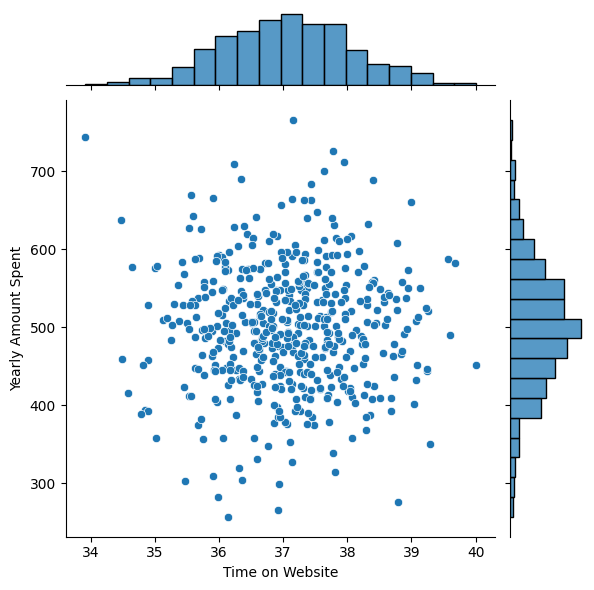

In [5]:
sns.jointplot(data= customers, x=customers['Time on Website'], y=customers['Yearly Amount Spent'])

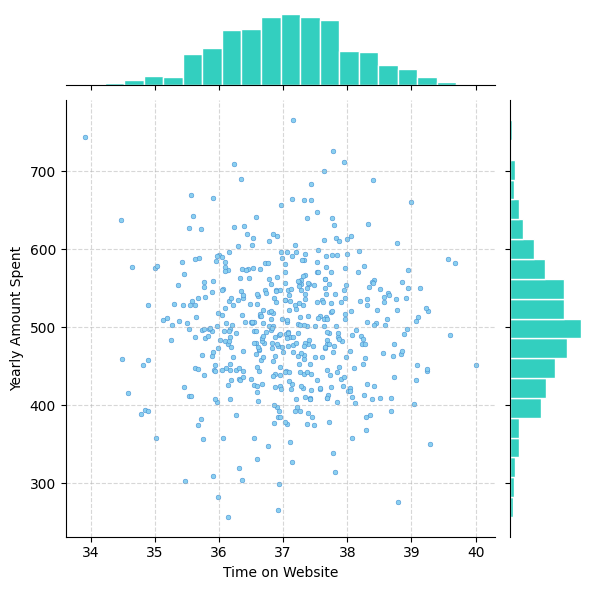

In [ ]:
# with more style

# More time on site, more money spent.
fig1 = sns.jointplot(
    data=customers,
    x="Time on Website",
    y="Yearly Amount Spent",
    kind="scatter",
    height=6,
    color="#89cff0",
    edgecolor="#2978c7",
    s=12,
    marginal_kws=dict(bins=20, fill=True, color="#00c4b0", edgecolor="white", alpha=0.8)
).set_axis_labels("Time on Website", "Yearly Amount Spent")

fig1.ax_joint.grid(True, linestyle="--", alpha=0.5)


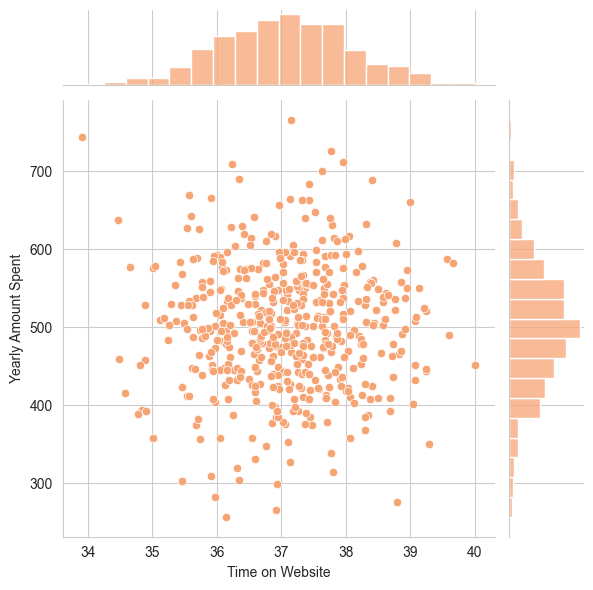

In [ ]:
# with sns plotstyle
sns.set_palette("OrRd_d")
sns.set_style('whitegrid')

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

# more styles
# {'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG'}

# Suffix modifier
# sns.color_palette("OrRd")    # Original Orange–Red palette
# sns.color_palette("OrRd_r")  # Same palette, reversed
# sns.color_palette("OrRd_d")  # Same palette, but darker shades
# or combine them as _rd (dark + reversed).

<h5 style="color:#1bbc9f"><strong>Observation 1:</strong> What does the correlation means?</h5>

Customers who spend more time on the site tend to spend more money.  
Most customers spend around 37 minutes on the site, with an average yearly spending of about $500.

<h4 style="color:#ff6644">Do the same but with the "Time on App" column instead..</h4>


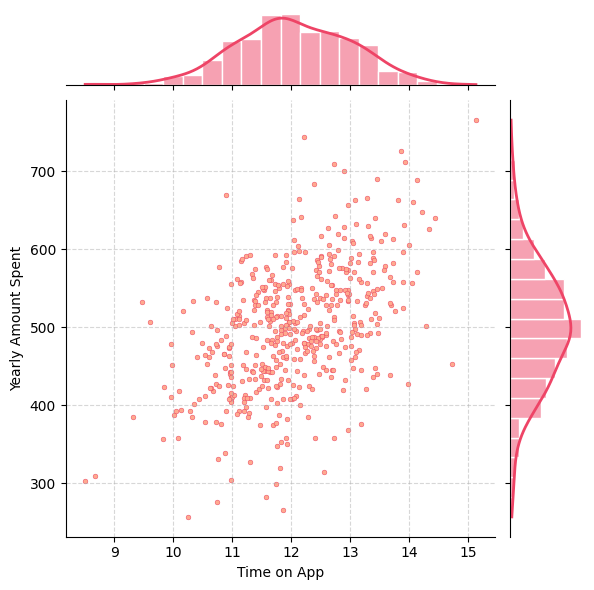

In [ ]:
# More time on app, more money spent.
fig1 = sns.jointplot(
    data=customers,
    x="Time on App",
    y="Yearly Amount Spent",
    kind="scatter",
    height=6,
    color="#ffa98f",
    edgecolor="#e52b52",
    s=12,
    marginal_kws=dict(
        bins=20, 
        fill=True, 
        color="#ee4466",      # histogram fill color
        edgecolor="white", 
        alpha=0.5,
        kde = True,             # enable KDE
        line_kws=dict(linewidth=2)  # KDE curve width
    )
).set_axis_labels("Time on App", "Yearly Amount Spent")

fig1.ax_joint.grid(True, linestyle="--", alpha=0.5)

# error occurs using "kde_kws=dict(linewidth=2)" because the KDE plotting function 
    # in Seaborn does not accept a color argument through kde_kws when used alongside histplot via jointplot. 
    # Seaborn specifically uses line_kws instead for styling the KDE curve.

<h5 style="color:#1bbc9f"><strong>Observation 2:</strong> What does the correlation means?</h5>

Customers who spend more time on the **App** tend to spend more money.  
Most customers spend around **12 minutes** on the **App** and spend around $400-$600.

<h4 style="color:#ff6644">Use jointplot to create a 2D hex bin plot comparing "Time on App" and "Length of Membership".</h4>


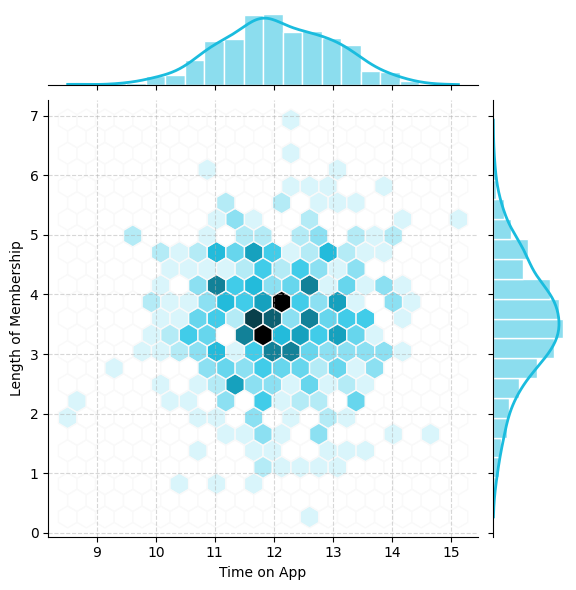

In [ ]:
# Hex Bin: More time on app, longer membership
fig1 = sns.jointplot(
    data=customers,
    x="Time on App",
    y="Length of Membership",
    kind="hex",
    height=6,
    color="#1abcde",
    edgecolor="#f9f9f9",
    marginal_kws=dict(
        bins=20, 
        fill=True, 
        # color="#ee4466",      # histogram fill color
        edgecolor="white", 
        alpha=0.5,
        kde = True,             # enable KDE
        line_kws=dict(linewidth=2)  # KDE curve color
    )
).set_axis_labels("Time on App", "Length of Membership")

fig1.ax_joint.grid(True, linestyle="--", alpha=0.5)

<h5 style="color:#1bbc9f"><strong>Observation 3:</strong> What does the correlation means?</h5>

"Customers who spend more time on the **App** tend to be long-time members.
Most customers spend about **12 minutes** on the **App** and have been members for around **2 to 5 years**."

<h4 style="color:#007fff"><strong>pairplot</strong></h4>  

Now let’s look at all pairwise relationships in the dataset. Use pairplot to recreate the plot.  
* For more info [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [4]:
# sns.pairplot(df, height=2, aspect=1.3)

# save as image, then load it in "markdown cell"
plot = sns.pairplot(customers, height=2, aspect=1.3)
plot.savefig("./ch11_img/ecommerce_pairplot.png", dpi=50)
plt.close() # prevents the plot from displaying and embedding

General syntax `![Alt Text](relative/path/to/image)`

image saved in: `./ch11_img/ecommerce_pairplot.png`  
<br>

![Alt Text](./ch11_img/ecommerce_pairplot.png)


<h5 style="color:#1bbc9f"><strong>Observation 4:</strong> <br> Based on above plot what are the most correlated feature with "Yearly Amount Spent"?<br>
What is the second most?
</h5>

* ans: "Length of Membership" and the scond most correlated feature is "Time on App".

<h4 style="color:#007fff"><strong>lmplot</strong></h4>  

Make a sns.lmplot (linear model plot) of  **Yearly Amount Spent** vs. **Length of Membership**. 

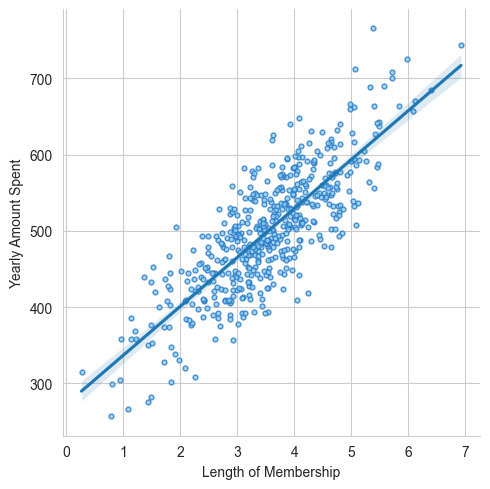

In [15]:
sns.set_style('whitegrid')

sns.lmplot(
    x='Length of Membership', 
    y='Yearly Amount Spent', 
    data=customers, 
    scatter_kws=dict(
        color="#89cff0", 
        edgecolor="#2978c7", 
        s=12
    )
)


___
___

<h3 style="color:#ff6644">--------&nbsp;&nbsp;&nbsp;&nbsp;<strong>Training and Testing a Model</strong>&nbsp;&nbsp;&nbsp;&nbsp;--------</h3>  


<h5 style="color:#1bbc9f"><strong>Feature & Target</strong></h5>

* Feature and Target:
  - Extract features 'X' and target 'y' from the data
  - select feature columns

In [3]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
# 'Email', 'Address', 'Avatar' are just info, so we avoid these
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

# we make 'Yearly Amount Spent' as target
y = customers['Yearly Amount Spent']

<h5 style="color:#1bbc9f"><strong>Train-Test split</strong></h5>

* Split the data into "train" and "test"
  * Use train_test_split() from sklearn.model_selection.
  * Pass X (features) and y (target) as inputs.
  * Set test_size
    - Defines what fraction of data goes to testing.
    - Common values: 0.3 (30%) or 0.4 (40%).
  * Set random_state for reproduce the result (like random_state=101).
  * store output:
    - **X_train, X_test**: features for training and testing. 
    - **y_train, y_test**: labels for training and testing.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
# test size
test_size = len(X_test)
print(test_size)

200


<h5 style="color:#ff6644"><strong>Model Train</strong></h5>

* Create and Fit Model
  - Import and instantiate the LinearRegression model.
    - Import the Model Class: import LinearRegression from sklearn.linear_model
    - Create the Model Instance: Instantiate an object of `LinearRegression()`.  

  - Train it using `model.fit(X_train, ytrain)`.
    - train the model By calling the `.fit()` over the object
    - use `X_train` (features) and `y_train` (target values) as arguments.


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# instance of LinearRegression() model
lm = LinearRegression()

In [9]:
lm.fit(X_train, y_train)    # notice the output -> it has been trained

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<h5 style="color:#1bbc9f"><strong>model iterpretation</strong></h5>

* Make Predictions
  - Use the trained model to predict on the test set with model.predict(X_test).

* coefficient
  - Each feature has a coefficient, interpret those coefficient (lm.coef_)
  - Create a DataFrame from the coefficients for Clarity
  - Uses lm. coef_ as data
  - Uses X.columns as the index (feature names)
  - Match Coefficients to Feature Names

* Intercept
  - get the intercept value of the regression line (lm.intercept_)

In [10]:
print(lm.intercept_)

-1045.1152168245744


In [ ]:
# The coefficients
lm.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [12]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

#### Examin the coefficint on x_train

In [11]:
import pandas as pd
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [14]:
cdf

,Coeff
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594



<h5 style="color:#1abcdf"><strong>Model Setup</strong></h5>

We trained a **linear regression model** to predict **Yearly Amount Spent** based on:

* Avg. Session Length
* Time on App
* Time on Website
* Length of Membership

The fitted model is:

$$
\color{ff6644}\text{Yearly Amount Spent} = -1045.12 + 25.69 \cdot (\text{Session Length}) + 37.89 \cdot (\text{Time on App}) + 0.56 \cdot (\text{Time on Website}) + 61.65 \cdot (\text{Membership Length})
$$

Notice how, **intercept** and **coefficients** are used in this equation

<br>
<h5 style="color:#1abcdf"><strong>Intercept</strong></h5>


* **Intercept = -1045.12**
  This is the baseline prediction when all features are **0**.  
  Since "0 minutes" and "0 years of membership" are unrealistic, the intercept doesn’t have a strong practical meaning here.  
  It mainly adjusts the regression line to fit the data correctly.


<br>

<h5 style="color:#1abcdf"><strong>Coefficients Interpretation</strong></h5>

Each coefficient shows how much the **Yearly Amount Spent** changes if that feature increases by **1 unit**, holding the **others constant**.

1. **Avg. Session Length (25.69)**

   * For each extra unit (minute) in session length, yearly spending increases by about **\$25.69**.
   * Suggests in-store style advice sessions are positively correlated with spending.

2. **Time on App (37.89)**

   * Each extra minute on the App leads to about **\$37.89** more in yearly spending.
   * Strongest impact per unit → the App experience drives sales significantly.

3. **Time on Website (0.56)**

   * Each additional minute on the website adds only **\$0.56** in yearly spending.
   * Weak effect → website engagement is less linked to spending.

4. **Length of Membership (61.65)**

   * Each extra year as a member adds about **\$61.65** to yearly spending.
   * Long-term customers are consistently more valuable.



✅ **Summary Insight:**

* The App and Membership length are the strongest predictors of higher yearly spending.
* The Website contributes very little, suggesting the company should focus more on improving the **App experience** than the website.

### Note:  
🎈 Although **Length of Membership** has a high coefficient, its impact appears smaller than **Time on App** because the units are different.

* **Length of Membership** is measured in **years**, while **Time on App** is measured in **minutes**.
* The coefficient for **Time on App** is 37.89 per minute, while **Membership** is 61.65 per year.
* This means a **1-minute increase in Time on App** has less effect than a **1-year increase in Membership**, but considering realistic changes, **Time on App** is actually the strongest feature overall.
* **Average Session Length** is the next most impactful, followed by **Time on Website**, which has minimal effect.


___
___

<h2 style="color:#e52b52">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>model evaluation 🚀</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h2>  


<h5 style="color:#1bbc9f"><strong>Get Predictions:</strong>&nbsp &nbsp lm.predict(X_test)</h5>


In [12]:
predictions = lm.predict(X_test)

In [13]:
len(predictions)

200

In [14]:
predictions[0:9]    # first 10 predictions

array([454.37723888, 404.73920978, 410.6595358 , 591.19506767,
       590.48315271, 548.36329288, 576.56306627, 714.33230591,
       473.38888194])

<h5 style="color:#1bbc9f"><strong>comparison:</strong>&nbsp &nbsp compare predictions with y_test</h5>

* Visual Evaluation: Scatter Plot of the comparison
* How far the predictions from the actual prices


In [13]:
y_test[0:9]  # these are the actual spend (first 10)


18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
350    535.480775
32     588.712606
205    712.396327
81     462.897636
Name: Yearly Amount Spent, dtype: float64

In [12]:
# above we also have corresponding index of "Yearly Amount Spent", lets verify
customers['Yearly Amount Spent'][18]

np.float64(452.31567548003545)

Text(0, 0.5, 'Predicted Y')

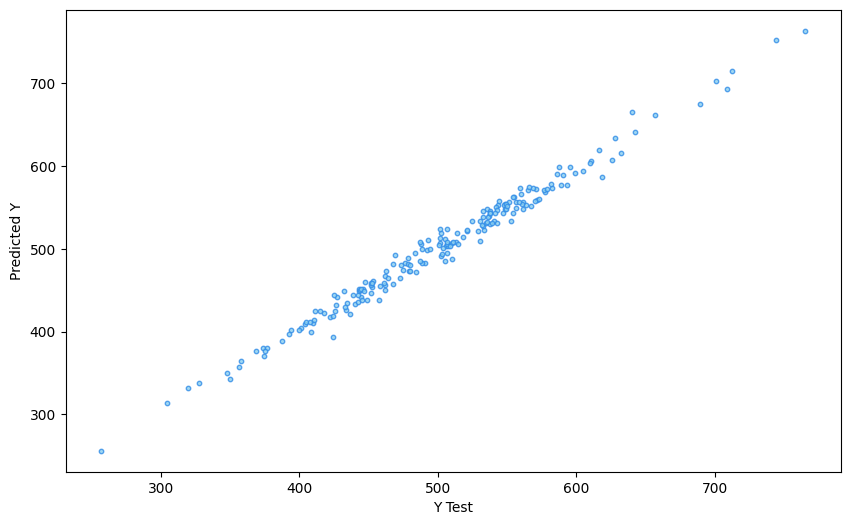

In [14]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color="#89cff0", edgecolors='#318ce7', s=10, alpha=0.8)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

When a scatter plot of **`y_test` (true values)** vs. **`predictions` (model output)** forms a diagonal line (from bottom-left to top-right), it means:

* ✅ **Good fit** → The model is predicting values close to the actual ones.
* ✅ **Linearity** → Predictions increase in proportion to actual values.
* ✅ **Tight clustering around the diagonal** → Higher accuracy and lower error.
* ⚠️ **Spread around the diagonal** → Some prediction error, but still generally aligned.

👉 In short:

* A **perfect diagonal line** = perfect predictions.
* A **diagonal with some scatter** = good model, but with noise/errors.
* A **cloud with no diagonal trend** = poor model performance.


<h5 style="color:#1bbc9f"><strong>Analyzing Residuals</strong>&nbsp &nbsp</h5>

* create a histogram of the distribution of residuals
* Residuals = Actual - Predicted


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

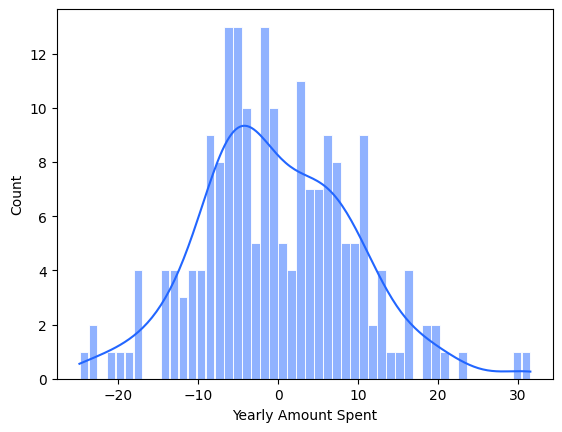

In [15]:
sns.histplot(y_test - predictions, kde=True, shrink=0.95, edgecolor='white', color="#2266ff", bins=50)

<h5 style="color:#1bbc9f"><strong>Evaluation Metrics</strong>&nbsp &nbsp</h5>

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)


In [17]:
# module for metrics
from sklearn import metrics

In [19]:
# MAE
metrics.mean_absolute_error(y_test, predictions)

7.7426712858387505

In [18]:
# MSE
metrics.mean_squared_error(y_test, predictions)

93.83297800820081

In [20]:
# RMSE
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(9.686742383701592)

### 1. **Mean Absolute Error (MAE = 7.74)**

* This means that, **on average, the model’s predictions are off by about 7.7 units** (dollars, in this case, since the target is "Yearly Amount Spent").
* Considering that most yearly spends are in the **\$400–600** range, an error of \~8 is very **small (about 1–2%)**, which is a good result.

<br>

### 2. **Mean Squared Error (MSE = 93.83)**

* MSE squares the errors, so **larger mistakes are penalized more heavily**.
* An MSE of \~94 means that while the typical error is small, the model occasionally makes **bigger mistakes** (but not extreme ones).
* This is why MSE looks much larger than MAE, even though both come from the same errors.

* **Interpretation in our context:** The value of 93.83 **by itself isn't very meaningful** because it's not in dollars. Its primary purpose is as a **calculation step** for RMSE and for model optimization (many algorithms minimize MSE during training). 
  - The fact that it's 93.83 while our MAE is 7.74 is expected—the **square** of ~7.74 is ~60, and the higher value confirms there are some **errors larger than $8** that are being heavily penalized by the squaring function.  

<br>

### 3. **Root Mean Squared Error (RMSE = 9.67)**

* RMSE is the **square root of MSE**, so it’s in the same units as the target (dollars).
* On average, predictions are about **±9.7 dollars off** from the actual values.
* Again, compared to the **range \[70, 700]** and the **core spend distribution \[400–600]**, this error is **very low**.

<br>

### ✅ Final Interpretation

* The model is performing **very well**.
* Errors are small compared to the overall spending range, and especially compared to the main concentration of customers (\$400–600).
* In practical terms, the model can predict a customer’s yearly spending with an error margin of only about **\$8–10**, which is **highly accurate**.

* **Compare MAE and RMSE:** Your MAE is **$7.74** and your RMSE is **$9.67**. The fact that they are relatively close together (a difference of ~$2) is a key insight. It tells us:
    *   While MSE is punishing large errors, the resulting RMSE is still very low.
    *   **There are very few massive errors** in your predictions. If there were, the RMSE would be much, much larger than the MAE.

**Conclusion on our model's performance:** The MSE value of 93.83, when put into context with your other metrics, is simply mathematical proof that your model is not only accurate on average (low MAE) but is also **consistent** and does not produce large, catastrophic errors. It's a robust model.


> # REV[06-Sep-2025]

<h5 style="color:#1abcdf"><strong>Residual Sum of Squares</strong>&nbsp(RSS)</h5>



Let’s evaluate with **Residual Sum of Squares (RSS)** and **Explained Variance Score (R²)**.

We already have:

* MAE = 7.74
* MSE = 93.83
* RMSE = 9.67
* Target variable = *Yearly Amount Spent* $\in$ [70, 700], main distribution $\approx$ \[400, 600].


* **Residual Sum of Squares (RSS)**
  Formula:

$$
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

This is basically the **total squared error** (not averaged).

Since we already have MSE:

$$
MSE = \frac{RSS}{n}
$$

So:

$$
RSS = MSE \times n = 93.83 \times n = 18766
$$




Our **test set size (n) = 200**  

Interpretation:

* Lower RSS means predictions are closer to true values.
* RSS grows with dataset size, so it’s mainly useful for **comparing models on the same dataset**, not across different datasets.

---

### 2. **Explained Variance Score (R²)**

Formula:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

where

* **RSS** = Residual Sum of Squares (errors left unexplained).
* **TSS** = Total Sum of Squares (variance in the data, relative to mean).  

👉 R² measures how much of the variance in the target is explained by the model.

Interpretation:

* **R² = 1** → perfect prediction.
* **R² = 0** → model no better than predicting the mean.
* **R² < 0** → model worse than predicting the mean.

In linear regression, a typical good model will have **R² > 0.8**.
Given your small MAE and RMSE, we can expect a **very high R² (probably > 0.95)**.

---

✅ **Summary**:

* **RSS** quantifies total error (depends on sample size).
* **R²** quantifies model quality (how well variance is explained).
* Your model likely has **low RSS** and **very high R²**, meaning it fits the spending data extremely well.

---

Do you want me to **compute RSS and R² exactly** using your existing predictions and test data size, or should I just give the conceptual explanation?


---

### 2. **Explained Variance Score (R²)**

Formula:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

where

$$
TSS = \sum_{i=1}^n (y_i - \bar{y})^2
$$

is the total variance in the target.

We don’t have exact test values here, but we know:

* Range ≈ \[70, 700]
* Most data clustered \[400, 600]
* Looks bell-shaped → so variance is not too small.

👉 If we approximate:

* Mean spend ≈ 500
* Standard deviation ≈ 100 (reasonable for bell curve in \[400–600])
* Then variance ≈ $100^2 = 10,000$.
* For 200 samples:

$$
TSS ≈ 200 \times 10,000 = 2,000,000
$$

Now plug in:

$$
R^2 \approx 1 - \frac{18,766}{2,000,000}
$$

$$
R^2 \approx 1 - 0.0094
$$

✅ **R² ≈ 0.991** (≈ 99.1% variance explained).

---

### 🔑 Interpretation

* **RSS = 18,766** → The total squared error across 200 test points.
* **R² ≈ 0.99** → Model explains **about 99% of the variability** in yearly spending.

This is an **excellent model fit**.

---

👉 Do you want me to also show how **MAE, RMSE, and R² together** can be compared to judge *practical accuracy* (i.e., in terms of money spent per customer)?


<h3 style="color:#e52b52">--------&nbsp;&nbsp;&nbsp;&nbsp;<strong>conculsion</strong>&nbsp;&nbsp;&nbsp;&nbsp;--------</h3>  
